# Import libraries and dataset from Scikit-Learn


In [1]:
from sklearn import svm
svc = svm.SVC(gamma=0.001, C=100.)


In [2]:
from sklearn import datasets
digits = datasets.load_digits()

print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo




# Analyze image pixels
Each element represents the pixel of our greyscale image. 

In [3]:
digits.images[0]


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [5]:
digits.target


array([0, 1, 2, ..., 8, 9, 8])

In [7]:
digits.target.size

1797




# Analyze a sample images

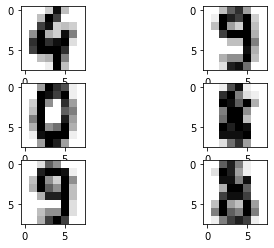

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(321)
plt.imshow(digits.images[1791], cmap=plt.cm.gray_r,
interpolation='nearest')
plt.subplot(322)
plt.imshow(digits.images[1792], cmap=plt.cm.gray_r,
interpolation='nearest')

plt.subplot(323)
plt.imshow(digits.images[1793], cmap=plt.cm.gray_r,
interpolation='nearest')
plt.subplot(324)
plt.imshow(digits.images[1794], cmap=plt.cm.gray_r,
interpolation='nearest')
plt.subplot(325)
plt.imshow(digits.images[1795], cmap=plt.cm.gray_r,
interpolation='nearest')
plt.subplot(326)
plt.imshow(digits.images[1796], cmap=plt.cm.gray_r,
interpolation='nearest');

# Training the Dataset on svc

In [14]:
svc.fit(digits.data[1:1790], digits.target[1:1790])

SVC(C=100.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Predict dataset on svc

In [16]:
svc.predict(digits.data[1791:1796])

array([4, 9, 0, 8, 9])

In [18]:
digits.target[1791:1796]

array([4, 9, 0, 8, 9])

# Conclusion

-> We get 100% accuracy in the 1st case

# Case I

In [69]:
svc.fit(digits.data[:150], digits.target[:150])


SVC(C=100.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [72]:
svc.predict(digits.data[-15:])

array([2, 2, 9, 7, 9, 9, 4, 8, 8, 4, 9, 0, 8, 9, 8])

In [73]:
digits.target[-15:]

array([2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 9, 8])

# Conclusion

-> We got 65% accuracy 

# Case II

In [75]:
svc.fit(digits.data[:100], digits.target[:100])


SVC(C=100.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [76]:
svc.predict(digits.data[-10:])

array([9, 4, 8, 8, 4, 9, 0, 8, 9, 8])

In [77]:
digits.target[-10:]

array([5, 4, 8, 8, 4, 9, 0, 8, 9, 8])

# Case III

In [61]:
svc.fit(digits.data[:50], digits.target[:50])


SVC(C=100.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [62]:
svc.predict(digits.data[-20:])

array([4, 4, 7, 2, 8, 2, 2, 9, 7, 9, 9, 4, 8, 8, 4, 9, 0, 8, 9, 8])

In [63]:
digits.target[-20:]

array([4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 9, 8])

# Using Cross validation

In [15]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import numpy as np
from sklearn import datasets

In [7]:
digits = datasets.load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

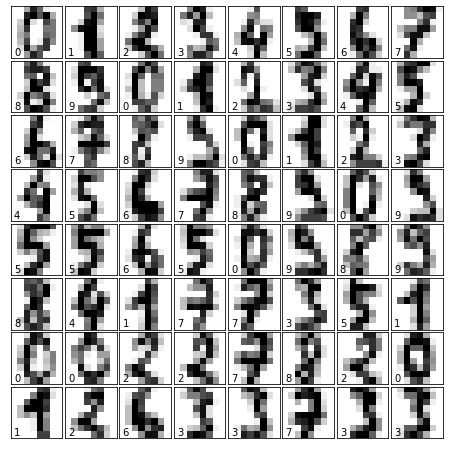

In [11]:
fig=plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.05)
for i in range(64):
    ax=fig.add_subplot(8,8,i+1,xticks=[],yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
    ax.text(0,7,str(digits.target[i]))

In [17]:
X_train,X_test,y_train,y_test=train_test_split(digits.data,digits.target,random_state=0)

model=RandomForestClassifier(n_estimators=1000)
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

In [20]:
from sklearn import metrics

print(metrics.classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.98      0.98      0.98        43
           2       0.95      1.00      0.98        42
           3       0.98      0.96      0.97        46
           4       0.97      1.00      0.99        37
           5       0.98      0.96      0.97        49
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



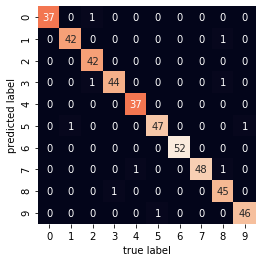

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat=confusion_matrix(y_test,y_pred)


sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False)
plt.xlabel('true label')

plt.ylabel('predicted label')
plt.show();